In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Assignment 7 
  #1. Mount the drive
  #2. Append the drive path to system path
  #3. Import files/modules and execute modules

In [2]:
!ls /content/gdrive/My\ Drive/eva-04/S7/*.py 

'/content/gdrive/My Drive/eva-04/S7/CIFARModel.py'
'/content/gdrive/My Drive/eva-04/S7/collect_env.py'
'/content/gdrive/My Drive/eva-04/S7/global_fun.py'
'/content/gdrive/My Drive/eva-04/S7/__init__.py'
'/content/gdrive/My Drive/eva-04/S7/Model.py'


In [0]:
!cat '/content/gdrive/My Drive/eva-04/S7/CIFARModel.py'

In [0]:
!cat '/content/gdrive/My Drive/eva-04/S7/global_fun.py'

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S7/')

Now we can import the library and use the function.

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def miscImages(model, device, test_loader):
    model.eval()
    test_loss = 0
    incorrect = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            for i in range(len(target)):
              if pred[i].item() != target[i]:
                incorrect += 1
                print('\n\n{} [ Predicted Value: {}, Actual Value: {} ]'.format(
                incorrect, pred[i].item(), target[i], ))
                plt.imshow(data[i].cpu().numpy().squeeze(), cmap='gray_r')
                plt.show()


In [0]:

import matplotlib.pyplot as plt
def draw_accuracy_loss_change_graps(model_0,model_l1,model_l2,model_l1_l2):
    fig, axs = plt.subplots(2,2,figsize=(30,20))
    #print('train_losses=',len(train_losses))
    #print('test_losses=',len(test_losses))

    axs[0,0].plot(model_0.m_test_losses,color='black',label='No Regularization')
    axs[0,0].plot(model_l1.m_test_losses,color='red',label='L1 Regularization')
    axs[0,0].plot(model_l2.m_test_losses,color='blue',label='L2 Regularization')
    axs[0,0].plot(model_l1_l2.m_test_losses,color='green',label='Both L1 and L2 Regularization')
    axs[0,0].set_title("Validation Loss Change")
    axs[0,0].legend(loc="center")

    axs[0,1].plot(model_0.m_test_acc,color='black',label='No Regularization')
    axs[0,1].plot(model_l1.m_test_acc,color='red',label='L1 Regularization')
    axs[0,1].plot(model_l2.m_test_acc,color='blue',label='L2 Regularization')
    axs[0,1].plot(model_l1_l2.m_test_acc,color='green',label='Both L1 and L2 Regularization')
    axs[0,1].set_title("Validation Accuracy Change")
    axs[0,1].legend(loc="center")

    axs[1,0].plot(model_0.m_train_losses,color='black',label='No Regularization')
    axs[1,0].plot(model_l1.m_train_losses,color='red',label='L1 Regularization')
    axs[1,0].plot(model_l2.m_train_losses,color='blue',label='L2 Regularization')
    axs[1,0].plot(model_l1_l2.m_train_losses,color='green',label='Both L1 and L2 Regularization')
    axs[1,0].set_title("Training Loss Change")
    axs[1,0].legend(loc="center")

    axs[1,1].plot(model_0.m_train_acc,color='black',label='No Regularization')
    axs[1,1].plot(model_l1.m_train_acc,color='red',label='L1 Regularization')
    axs[1,1].plot(model_l2.m_train_acc,color='blue',label='L2 Regularization')
    axs[1,1].plot(model_l1_l2.m_train_acc,color='green',label='Both L1 and L2 Regularization')
    axs[1,1].set_title("Training Accuracy Change")
    axs[1,1].legend(loc="center")

In [8]:
import Model as m
import CIFARModel as cifar

import importlib
importlib.reload(m)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = m.CIFAR_Depthwise_Separable_Model().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)

cifar_model = cifar.CIFARModel(model)

from global_fun import test_model
from global_fun import train_model
from global_fun import show_summary, run_model 



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


RUNNING WITH REGULARIZATION

In [9]:

run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.00001, EPOCHS=80)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 0


Loss=1.8994804620742798 Batch_id=195 Accuracy=36.54: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 3118/10000 (31.18%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 1


Loss=1.57611882686615 Batch_id=195 Accuracy=46.47: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 3818/10000 (38.18%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 2


Loss=1.7093228101730347 Batch_id=195 Accuracy=50.47: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 4233/10000 (42.33%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 3


Loss=1.1867377758026123 Batch_id=195 Accuracy=53.55: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 4684/10000 (46.84%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 4


Loss=1.2851357460021973 Batch_id=195 Accuracy=55.24: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 4501/10000 (45.01%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 5


Loss=1.2559256553649902 Batch_id=195 Accuracy=57.33: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 4828/10000 (48.28%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 6


Loss=1.2243045568466187 Batch_id=195 Accuracy=58.61: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 5341/10000 (53.41%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 7


Loss=1.167764663696289 Batch_id=195 Accuracy=59.65: 100%|██████████| 196/196 [00:35<00:00,  5.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 5128/10000 (51.28%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 8


Loss=1.3257523775100708 Batch_id=195 Accuracy=60.90: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5294/10000 (52.94%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 9


Loss=1.2797973155975342 Batch_id=195 Accuracy=61.43: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5370/10000 (53.70%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 10


Loss=1.2594244480133057 Batch_id=195 Accuracy=62.24: 100%|██████████| 196/196 [00:35<00:00,  5.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 5070/10000 (50.70%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 11


Loss=1.0553834438323975 Batch_id=195 Accuracy=62.84: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 5468/10000 (54.68%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 12


Loss=1.0434762239456177 Batch_id=195 Accuracy=63.56: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 5539/10000 (55.39%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 13


Loss=1.1760519742965698 Batch_id=195 Accuracy=64.14: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6145/10000 (61.45%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 14


Loss=0.967938244342804 Batch_id=195 Accuracy=64.70: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6071/10000 (60.71%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 15


Loss=1.0138719081878662 Batch_id=195 Accuracy=65.19: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 5765/10000 (57.65%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 16


Loss=1.0400097370147705 Batch_id=195 Accuracy=65.72: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5993/10000 (59.93%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 17


Loss=0.9899267554283142 Batch_id=195 Accuracy=66.28: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6183/10000 (61.83%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 18


Loss=1.0548362731933594 Batch_id=195 Accuracy=66.16: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5941/10000 (59.41%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 19


Loss=1.0117859840393066 Batch_id=195 Accuracy=66.35: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6101/10000 (61.01%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 20


Loss=1.146589994430542 Batch_id=195 Accuracy=66.77: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6008/10000 (60.08%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 21


Loss=1.0917450189590454 Batch_id=195 Accuracy=67.28: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6160/10000 (61.60%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 22


Loss=0.8480464816093445 Batch_id=195 Accuracy=67.69: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5996/10000 (59.96%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 23


Loss=1.145005702972412 Batch_id=195 Accuracy=67.85: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6571/10000 (65.71%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 24


Loss=1.28583824634552 Batch_id=195 Accuracy=68.13: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6498/10000 (64.98%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 25


Loss=1.0483266115188599 Batch_id=195 Accuracy=68.27: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6573/10000 (65.73%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 26


Loss=1.2695590257644653 Batch_id=195 Accuracy=68.77: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6375/10000 (63.75%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 27


Loss=1.3854098320007324 Batch_id=195 Accuracy=68.86: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6141/10000 (61.41%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 28


Loss=0.9657601118087769 Batch_id=195 Accuracy=69.42: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6545/10000 (65.45%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 29


Loss=1.2881267070770264 Batch_id=195 Accuracy=69.54: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6460/10000 (64.60%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 30


Loss=1.1652953624725342 Batch_id=195 Accuracy=69.50: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6539/10000 (65.39%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 31


Loss=1.421270728111267 Batch_id=195 Accuracy=69.87: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6159/10000 (61.59%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 32


Loss=0.9678629040718079 Batch_id=195 Accuracy=70.11: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6193/10000 (61.93%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 33


Loss=0.8625589609146118 Batch_id=195 Accuracy=70.19: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6680/10000 (66.80%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 34


Loss=1.1334232091903687 Batch_id=195 Accuracy=70.24: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6386/10000 (63.86%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 35


Loss=0.8611305356025696 Batch_id=195 Accuracy=70.68: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6737/10000 (67.37%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 36


Loss=1.087441086769104 Batch_id=195 Accuracy=70.89: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6466/10000 (64.66%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 37


Loss=1.315018653869629 Batch_id=195 Accuracy=71.01: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6738/10000 (67.38%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 38


Loss=1.1622586250305176 Batch_id=195 Accuracy=71.19: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6134/10000 (61.34%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 39


Loss=1.061398983001709 Batch_id=195 Accuracy=71.66: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6803/10000 (68.03%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 40


Loss=0.8463358879089355 Batch_id=195 Accuracy=71.58: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6506/10000 (65.06%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 41


Loss=0.9607989192008972 Batch_id=195 Accuracy=71.63: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6659/10000 (66.59%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 42


Loss=1.0357747077941895 Batch_id=195 Accuracy=71.97: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6465/10000 (64.65%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 43


Loss=1.1794633865356445 Batch_id=195 Accuracy=71.85: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6845/10000 (68.45%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 44


Loss=1.2580814361572266 Batch_id=195 Accuracy=72.48: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6699/10000 (66.99%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 45


Loss=0.9208406209945679 Batch_id=195 Accuracy=72.58: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6820/10000 (68.20%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 46


Loss=0.9173827171325684 Batch_id=195 Accuracy=72.57: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6616/10000 (66.16%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 47


Loss=0.9299590587615967 Batch_id=195 Accuracy=73.05: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6890/10000 (68.90%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 48


Loss=0.9987027049064636 Batch_id=195 Accuracy=72.98: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6847/10000 (68.47%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 49


Loss=0.9947150945663452 Batch_id=195 Accuracy=73.52: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6907/10000 (69.07%)

EPOCH: 50
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 50


Loss=0.8398927450180054 Batch_id=195 Accuracy=73.53: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6816/10000 (68.16%)

EPOCH: 51
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 51


Loss=1.039664626121521 Batch_id=195 Accuracy=73.67: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6977/10000 (69.77%)

EPOCH: 52
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 52


Loss=0.8888341188430786 Batch_id=195 Accuracy=73.83: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7081/10000 (70.81%)

EPOCH: 53
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 53


Loss=1.0626734495162964 Batch_id=195 Accuracy=74.29: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6636/10000 (66.36%)

EPOCH: 54
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 54


Loss=0.899179995059967 Batch_id=195 Accuracy=74.51: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6740/10000 (67.40%)

EPOCH: 55
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 55


Loss=0.9942917227745056 Batch_id=195 Accuracy=74.65: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7156/10000 (71.56%)

EPOCH: 56
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 56


Loss=0.7323093414306641 Batch_id=195 Accuracy=74.85: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7219/10000 (72.19%)

EPOCH: 57
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 57


Loss=0.785270094871521 Batch_id=195 Accuracy=75.14: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6928/10000 (69.28%)

EPOCH: 58
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 58


Loss=0.8667869567871094 Batch_id=195 Accuracy=75.59: 100%|██████████| 196/196 [00:36<00:00,  5.35it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6892/10000 (68.92%)

EPOCH: 59
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 59


Loss=0.9604010581970215 Batch_id=195 Accuracy=75.47: 100%|██████████| 196/196 [00:35<00:00,  5.45it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6919/10000 (69.19%)

EPOCH: 60
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 60


Loss=0.8865871429443359 Batch_id=195 Accuracy=75.82: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6955/10000 (69.55%)

EPOCH: 61
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 61


Loss=1.0291095972061157 Batch_id=195 Accuracy=75.94: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7096/10000 (70.96%)

EPOCH: 62
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 62


Loss=0.9199620485305786 Batch_id=195 Accuracy=76.11: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6831/10000 (68.31%)

EPOCH: 63
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 63


Loss=1.0421751737594604 Batch_id=195 Accuracy=76.21: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7203/10000 (72.03%)

EPOCH: 64
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 64


Loss=1.0027806758880615 Batch_id=195 Accuracy=76.33: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7250/10000 (72.50%)

EPOCH: 65
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 65


Loss=1.0823159217834473 Batch_id=195 Accuracy=76.47: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7051/10000 (70.51%)

EPOCH: 66
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 66


Loss=0.8365186452865601 Batch_id=195 Accuracy=76.80: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7247/10000 (72.47%)

EPOCH: 67
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 67


Loss=0.9705327749252319 Batch_id=195 Accuracy=77.00: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7223/10000 (72.23%)

EPOCH: 68
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 68


Loss=1.030358076095581 Batch_id=195 Accuracy=77.10: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6998/10000 (69.98%)

EPOCH: 69
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 69


Loss=0.9661621451377869 Batch_id=195 Accuracy=77.37: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7048/10000 (70.48%)

EPOCH: 70
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 70


Loss=0.9116535186767578 Batch_id=195 Accuracy=77.59: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6987/10000 (69.87%)

EPOCH: 71
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 71


Loss=0.9858816266059875 Batch_id=195 Accuracy=77.66: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7422/10000 (74.22%)

EPOCH: 72
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 72


Loss=0.9395476579666138 Batch_id=195 Accuracy=77.69: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7035/10000 (70.35%)

EPOCH: 73
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 73


Loss=0.9617922306060791 Batch_id=195 Accuracy=78.13: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7308/10000 (73.08%)

EPOCH: 74
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 74


Loss=0.9769248366355896 Batch_id=195 Accuracy=77.84: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7075/10000 (70.75%)

EPOCH: 75
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 75


Loss=0.9603663682937622 Batch_id=195 Accuracy=77.95: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7305/10000 (73.05%)

EPOCH: 76
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 76


Loss=0.8488864302635193 Batch_id=195 Accuracy=78.27: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7262/10000 (72.62%)

EPOCH: 77
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 77


Loss=0.7402577996253967 Batch_id=195 Accuracy=78.80: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7321/10000 (73.21%)

EPOCH: 78
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 78


Loss=0.9410187602043152 Batch_id=195 Accuracy=78.62: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7136/10000 (71.36%)

EPOCH: 79
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 79


Loss=0.7523406744003296 Batch_id=195 Accuracy=78.96: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]



Test set: Average loss: 0.0031, Accuracy: 7309/10000 (73.09%)



In [10]:
run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0001, EPOCHS=50)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 0


Loss=3.0392446517944336 Batch_id=195 Accuracy=78.65: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7355/10000 (73.55%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 1


Loss=3.064680576324463 Batch_id=195 Accuracy=79.24: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7504/10000 (75.04%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 2


Loss=3.2193899154663086 Batch_id=195 Accuracy=79.34: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7220/10000 (72.20%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 3


Loss=3.1391475200653076 Batch_id=195 Accuracy=79.41: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7358/10000 (73.58%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 4


Loss=3.3166847229003906 Batch_id=195 Accuracy=79.32: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7447/10000 (74.47%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 5


Loss=3.240055561065674 Batch_id=195 Accuracy=79.78: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7469/10000 (74.69%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 6


Loss=3.043799638748169 Batch_id=195 Accuracy=79.61: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7403/10000 (74.03%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 7


Loss=3.231983184814453 Batch_id=195 Accuracy=79.56: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7371/10000 (73.71%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 8


Loss=3.3729543685913086 Batch_id=195 Accuracy=79.67: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7326/10000 (73.26%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 9


Loss=3.267185688018799 Batch_id=195 Accuracy=79.75: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7260/10000 (72.60%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 10


Loss=3.290276527404785 Batch_id=195 Accuracy=80.10: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7304/10000 (73.04%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 11


Loss=3.2118172645568848 Batch_id=195 Accuracy=79.94: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7190/10000 (71.90%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 12


Loss=3.2646565437316895 Batch_id=195 Accuracy=80.09: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6972/10000 (69.72%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 13


Loss=3.2658047676086426 Batch_id=195 Accuracy=80.22: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7502/10000 (75.02%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 14


Loss=3.306015968322754 Batch_id=195 Accuracy=80.49: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7244/10000 (72.44%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 15


Loss=3.3395144939422607 Batch_id=195 Accuracy=80.28: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6944/10000 (69.44%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 16


Loss=3.298855781555176 Batch_id=195 Accuracy=80.66: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6895/10000 (68.95%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 17


Loss=3.207956552505493 Batch_id=195 Accuracy=80.53: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7527/10000 (75.27%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 18


Loss=3.292091131210327 Batch_id=195 Accuracy=80.80: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7274/10000 (72.74%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 19


Loss=3.2920360565185547 Batch_id=195 Accuracy=80.74: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7214/10000 (72.14%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 20


Loss=3.414060592651367 Batch_id=195 Accuracy=80.85: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7548/10000 (75.48%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 21


Loss=3.296335220336914 Batch_id=195 Accuracy=80.77: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7436/10000 (74.36%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 22


Loss=3.337970733642578 Batch_id=195 Accuracy=81.06: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7475/10000 (74.75%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 23


Loss=3.339128017425537 Batch_id=195 Accuracy=81.48: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7580/10000 (75.80%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 24


Loss=3.294839382171631 Batch_id=195 Accuracy=81.48: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7284/10000 (72.84%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 25


Loss=3.4826149940490723 Batch_id=195 Accuracy=81.25: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6781/10000 (67.81%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 26


Loss=3.4631505012512207 Batch_id=195 Accuracy=81.40: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7424/10000 (74.24%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 27


Loss=3.4574410915374756 Batch_id=195 Accuracy=81.42: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7634/10000 (76.34%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 28


Loss=3.685061454772949 Batch_id=195 Accuracy=81.64: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7530/10000 (75.30%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 29


Loss=3.3802924156188965 Batch_id=195 Accuracy=81.63: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6836/10000 (68.36%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 30


Loss=3.3426735401153564 Batch_id=195 Accuracy=81.42: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7613/10000 (76.13%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 31


Loss=3.4254355430603027 Batch_id=195 Accuracy=81.77: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7041/10000 (70.41%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 32


Loss=3.575408458709717 Batch_id=195 Accuracy=81.96: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7391/10000 (73.91%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 33


Loss=3.6054465770721436 Batch_id=195 Accuracy=81.89: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7346/10000 (73.46%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 34


Loss=3.6235978603363037 Batch_id=195 Accuracy=82.05: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7593/10000 (75.93%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 35


Loss=3.811007022857666 Batch_id=195 Accuracy=81.95: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7685/10000 (76.85%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 36


Loss=3.564772367477417 Batch_id=195 Accuracy=81.71: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7125/10000 (71.25%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 37


Loss=3.6241233348846436 Batch_id=195 Accuracy=82.00: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7559/10000 (75.59%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 38


Loss=3.5329806804656982 Batch_id=195 Accuracy=82.15: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7650/10000 (76.50%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 39


Loss=3.5564420223236084 Batch_id=195 Accuracy=82.18: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7527/10000 (75.27%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 40


Loss=3.546566963195801 Batch_id=195 Accuracy=82.12: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7530/10000 (75.30%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 41


Loss=3.6186821460723877 Batch_id=195 Accuracy=82.66: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7625/10000 (76.25%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 42


Loss=3.6695175170898438 Batch_id=195 Accuracy=82.22: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7481/10000 (74.81%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 43


Loss=3.6535897254943848 Batch_id=195 Accuracy=82.27: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7517/10000 (75.17%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 44


Loss=3.5629310607910156 Batch_id=195 Accuracy=82.58: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7249/10000 (72.49%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 45


Loss=3.5945236682891846 Batch_id=195 Accuracy=82.69: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7457/10000 (74.57%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 46


Loss=3.6163625717163086 Batch_id=195 Accuracy=82.69: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7478/10000 (74.78%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 47


Loss=3.674403667449951 Batch_id=195 Accuracy=82.62: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7440/10000 (74.40%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 48


Loss=3.7284276485443115 Batch_id=195 Accuracy=82.96: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7358/10000 (73.58%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 0.0001 epoch= 49


Loss=3.707516670227051 Batch_id=195 Accuracy=82.96: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]



Test set: Average loss: 0.0033, Accuracy: 7126/10000 (71.26%)



In [11]:
run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.00001, EPOCHS=50)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 0


Loss=0.9284704923629761 Batch_id=195 Accuracy=83.00: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7368/10000 (73.68%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 1


Loss=0.7973533868789673 Batch_id=195 Accuracy=82.97: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7460/10000 (74.60%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 2


Loss=0.9500182867050171 Batch_id=195 Accuracy=82.93: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7138/10000 (71.38%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 3


Loss=0.8001331090927124 Batch_id=195 Accuracy=82.93: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7624/10000 (76.24%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 4


Loss=0.8525816798210144 Batch_id=195 Accuracy=83.08: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7462/10000 (74.62%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 5


Loss=0.7704600095748901 Batch_id=195 Accuracy=83.17: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7594/10000 (75.94%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 6


Loss=0.7057613134384155 Batch_id=195 Accuracy=83.05: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7629/10000 (76.29%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 7


Loss=0.6608971357345581 Batch_id=195 Accuracy=82.97: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6929/10000 (69.29%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 8


Loss=0.7477784156799316 Batch_id=195 Accuracy=83.33: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7132/10000 (71.32%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 9


Loss=0.90045565366745 Batch_id=195 Accuracy=83.56: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6744/10000 (67.44%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 10


Loss=0.8324875831604004 Batch_id=195 Accuracy=83.61: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7446/10000 (74.46%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 11


Loss=0.8306366205215454 Batch_id=195 Accuracy=83.46: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7395/10000 (73.95%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 12


Loss=0.7342175245285034 Batch_id=195 Accuracy=83.42: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7456/10000 (74.56%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 13


Loss=0.7647373676300049 Batch_id=195 Accuracy=83.43: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7687/10000 (76.87%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 14


Loss=0.9312843084335327 Batch_id=195 Accuracy=83.61: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7753/10000 (77.53%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 15


Loss=0.771894097328186 Batch_id=195 Accuracy=83.64: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7636/10000 (76.36%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 16


Loss=0.7621181011199951 Batch_id=195 Accuracy=83.45: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7518/10000 (75.18%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 17


Loss=0.9037507772445679 Batch_id=195 Accuracy=83.84: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7162/10000 (71.62%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 18


Loss=0.6922354698181152 Batch_id=195 Accuracy=83.80: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7616/10000 (76.16%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 19


Loss=0.6725711822509766 Batch_id=195 Accuracy=83.85: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7648/10000 (76.48%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 20


Loss=0.7294909954071045 Batch_id=195 Accuracy=83.97: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7019/10000 (70.19%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 21


Loss=0.7372450232505798 Batch_id=195 Accuracy=83.99: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7069/10000 (70.69%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 22


Loss=0.7751286625862122 Batch_id=195 Accuracy=83.91: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7271/10000 (72.71%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 23


Loss=0.8775191307067871 Batch_id=195 Accuracy=83.91: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7624/10000 (76.24%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 24


Loss=0.7274786233901978 Batch_id=195 Accuracy=83.84: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7629/10000 (76.29%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 25


Loss=0.8964492082595825 Batch_id=195 Accuracy=84.09: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7655/10000 (76.55%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 26


Loss=1.1350669860839844 Batch_id=195 Accuracy=84.13: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7752/10000 (77.52%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 27


Loss=0.808241605758667 Batch_id=195 Accuracy=84.11: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7637/10000 (76.37%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 28


Loss=0.8566486835479736 Batch_id=195 Accuracy=84.23: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7453/10000 (74.53%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 29


Loss=0.819199800491333 Batch_id=195 Accuracy=84.27: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7520/10000 (75.20%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 30


Loss=0.783708930015564 Batch_id=195 Accuracy=84.39: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7692/10000 (76.92%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 31


Loss=0.8388826847076416 Batch_id=195 Accuracy=84.33: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7584/10000 (75.84%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 32


Loss=0.8111848831176758 Batch_id=195 Accuracy=84.19: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7566/10000 (75.66%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 33


Loss=0.957923173904419 Batch_id=195 Accuracy=84.21: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7612/10000 (76.12%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 34


Loss=0.9363781809806824 Batch_id=195 Accuracy=84.45: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7558/10000 (75.58%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 35


Loss=0.8296211957931519 Batch_id=195 Accuracy=84.54: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7561/10000 (75.61%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 36


Loss=0.8088579177856445 Batch_id=195 Accuracy=84.55: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7584/10000 (75.84%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 37


Loss=0.8927171230316162 Batch_id=195 Accuracy=84.56: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7459/10000 (74.59%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 38


Loss=0.8900285959243774 Batch_id=195 Accuracy=84.59: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7748/10000 (77.48%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 39


Loss=0.6802475452423096 Batch_id=195 Accuracy=84.48: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7806/10000 (78.06%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 40


Loss=0.8855875730514526 Batch_id=195 Accuracy=84.48: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7403/10000 (74.03%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 41


Loss=0.842062771320343 Batch_id=195 Accuracy=84.73: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7578/10000 (75.78%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 42


Loss=0.8257872462272644 Batch_id=195 Accuracy=84.64: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7702/10000 (77.02%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 43


Loss=0.7715719938278198 Batch_id=195 Accuracy=84.76: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7515/10000 (75.15%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 44


Loss=0.7947971820831299 Batch_id=195 Accuracy=84.69: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7741/10000 (77.41%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 45


Loss=0.8190483450889587 Batch_id=195 Accuracy=84.82: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7781/10000 (77.81%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 46


Loss=0.8571492433547974 Batch_id=195 Accuracy=85.09: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7478/10000 (74.78%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 47


Loss=0.7198450565338135 Batch_id=195 Accuracy=84.93: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7399/10000 (73.99%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 48


Loss=0.7505529522895813 Batch_id=195 Accuracy=84.53: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7690/10000 (76.90%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 49


Loss=0.7577934265136719 Batch_id=195 Accuracy=85.09: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]



Test set: Average loss: 0.0032, Accuracy: 7302/10000 (73.02%)



In [12]:
run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.00001, EPOCHS=80)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 0


Loss=0.7828580737113953 Batch_id=195 Accuracy=84.88: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7672/10000 (76.72%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 1


Loss=0.9322729110717773 Batch_id=195 Accuracy=85.19: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7594/10000 (75.94%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 2


Loss=0.9024312496185303 Batch_id=195 Accuracy=85.09: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7702/10000 (77.02%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 3


Loss=0.9198416471481323 Batch_id=195 Accuracy=85.33: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7537/10000 (75.37%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 4


Loss=0.8053923845291138 Batch_id=195 Accuracy=85.18: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7449/10000 (74.49%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 5


Loss=0.9987602233886719 Batch_id=195 Accuracy=85.23: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7583/10000 (75.83%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 6


Loss=0.792881190776825 Batch_id=195 Accuracy=85.31: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7520/10000 (75.20%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 7


Loss=0.7414360642433167 Batch_id=195 Accuracy=85.28: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7577/10000 (75.77%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 8


Loss=0.84288489818573 Batch_id=195 Accuracy=85.24: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7801/10000 (78.01%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 9


Loss=0.7834360003471375 Batch_id=195 Accuracy=85.38: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7462/10000 (74.62%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 10


Loss=0.7242820858955383 Batch_id=195 Accuracy=85.53: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7505/10000 (75.05%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 11


Loss=0.8033514618873596 Batch_id=195 Accuracy=85.34: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7710/10000 (77.10%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 12


Loss=0.7404929995536804 Batch_id=195 Accuracy=85.42: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7698/10000 (76.98%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 13


Loss=0.9070749282836914 Batch_id=195 Accuracy=85.41: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7745/10000 (77.45%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 14


Loss=0.7001760005950928 Batch_id=195 Accuracy=85.36: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7841/10000 (78.41%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 15


Loss=0.8302054405212402 Batch_id=195 Accuracy=85.59: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7636/10000 (76.36%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 16


Loss=0.7582670450210571 Batch_id=195 Accuracy=85.63: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7599/10000 (75.99%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 17


Loss=0.7784481644630432 Batch_id=195 Accuracy=85.66: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7701/10000 (77.01%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 18


Loss=0.7472931146621704 Batch_id=195 Accuracy=85.63: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7563/10000 (75.63%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 19


Loss=0.939656138420105 Batch_id=195 Accuracy=85.55: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7608/10000 (76.08%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 20


Loss=0.7750927209854126 Batch_id=195 Accuracy=85.60: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7608/10000 (76.08%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 21


Loss=0.8388863205909729 Batch_id=195 Accuracy=85.93: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7665/10000 (76.65%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 22


Loss=0.724947452545166 Batch_id=195 Accuracy=85.96: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7675/10000 (76.75%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 23


Loss=0.7963968515396118 Batch_id=195 Accuracy=85.88: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7728/10000 (77.28%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 24


Loss=0.9655493497848511 Batch_id=195 Accuracy=85.82: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7363/10000 (73.63%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 25


Loss=0.7583575248718262 Batch_id=195 Accuracy=85.61: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7485/10000 (74.85%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 26


Loss=0.9299379587173462 Batch_id=195 Accuracy=86.13: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7751/10000 (77.51%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 27


Loss=0.8377640247344971 Batch_id=195 Accuracy=85.86: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7626/10000 (76.26%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 28


Loss=0.9931370615959167 Batch_id=195 Accuracy=86.03: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7717/10000 (77.17%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 29


Loss=0.6377801895141602 Batch_id=195 Accuracy=85.81: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7617/10000 (76.17%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 30


Loss=1.023484230041504 Batch_id=195 Accuracy=86.10: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7758/10000 (77.58%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 31


Loss=0.813744068145752 Batch_id=195 Accuracy=86.12: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7711/10000 (77.11%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 32


Loss=0.8115360736846924 Batch_id=195 Accuracy=86.13: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7273/10000 (72.73%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 33


Loss=0.6840938329696655 Batch_id=195 Accuracy=85.84: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7650/10000 (76.50%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 34


Loss=0.7494628429412842 Batch_id=195 Accuracy=86.19: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7725/10000 (77.25%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 35


Loss=0.7899037599563599 Batch_id=195 Accuracy=86.08: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7517/10000 (75.17%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 36


Loss=0.6814321279525757 Batch_id=195 Accuracy=86.19: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7563/10000 (75.63%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 37


Loss=0.7213195562362671 Batch_id=195 Accuracy=86.51: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7639/10000 (76.39%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 38


Loss=0.8784905076026917 Batch_id=195 Accuracy=86.09: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7573/10000 (75.73%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 39


Loss=1.0690134763717651 Batch_id=195 Accuracy=86.31: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7424/10000 (74.24%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 40


Loss=0.8913108110427856 Batch_id=195 Accuracy=86.43: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7557/10000 (75.57%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 41


Loss=0.8368115425109863 Batch_id=195 Accuracy=86.20: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7362/10000 (73.62%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 42


Loss=0.9439780712127686 Batch_id=195 Accuracy=86.19: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7578/10000 (75.78%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 43


Loss=0.9182314872741699 Batch_id=195 Accuracy=86.40: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7733/10000 (77.33%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 44


Loss=0.9091439843177795 Batch_id=195 Accuracy=86.42: 100%|██████████| 196/196 [00:35<00:00,  5.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7604/10000 (76.04%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 45


Loss=0.6813666820526123 Batch_id=195 Accuracy=86.75: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7660/10000 (76.60%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 46


Loss=0.8787367343902588 Batch_id=195 Accuracy=86.47: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7243/10000 (72.43%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 47


Loss=0.7413182258605957 Batch_id=195 Accuracy=86.50: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7668/10000 (76.68%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 48


Loss=0.9837023019790649 Batch_id=195 Accuracy=86.08: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7441/10000 (74.41%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 49


Loss=0.7982674837112427 Batch_id=195 Accuracy=86.22: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7526/10000 (75.26%)

EPOCH: 50
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 50


Loss=0.9161664247512817 Batch_id=195 Accuracy=86.71: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7643/10000 (76.43%)

EPOCH: 51
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 51


Loss=0.760875940322876 Batch_id=195 Accuracy=86.62: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7313/10000 (73.13%)

EPOCH: 52
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 52


Loss=0.6702848076820374 Batch_id=195 Accuracy=86.66: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7835/10000 (78.35%)

EPOCH: 53
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 53


Loss=0.853059709072113 Batch_id=195 Accuracy=86.76: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7631/10000 (76.31%)

EPOCH: 54
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 54


Loss=0.7874110341072083 Batch_id=195 Accuracy=86.59: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7569/10000 (75.69%)

EPOCH: 55
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 55


Loss=0.8552433252334595 Batch_id=195 Accuracy=86.99: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7632/10000 (76.32%)

EPOCH: 56
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 56


Loss=0.8431843519210815 Batch_id=195 Accuracy=86.85: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7599/10000 (75.99%)

EPOCH: 57
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 57


Loss=0.7830406427383423 Batch_id=195 Accuracy=86.72: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7782/10000 (77.82%)

EPOCH: 58
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 58


Loss=0.8546270132064819 Batch_id=195 Accuracy=86.75: 100%|██████████| 196/196 [00:35<00:00,  5.49it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7379/10000 (73.79%)

EPOCH: 59
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 59


Loss=0.7801758050918579 Batch_id=195 Accuracy=86.88: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7615/10000 (76.15%)

EPOCH: 60
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 60


Loss=0.8904361128807068 Batch_id=195 Accuracy=86.73: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7546/10000 (75.46%)

EPOCH: 61
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 61


Loss=0.8111730813980103 Batch_id=195 Accuracy=86.72: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7744/10000 (77.44%)

EPOCH: 62
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 62


Loss=0.9422659873962402 Batch_id=195 Accuracy=86.98: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7778/10000 (77.78%)

EPOCH: 63
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 63


Loss=0.8930127620697021 Batch_id=195 Accuracy=87.05: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7808/10000 (78.08%)

EPOCH: 64
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 64


Loss=0.7345166206359863 Batch_id=195 Accuracy=86.82: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7447/10000 (74.47%)

EPOCH: 65
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 65


Loss=0.7461435794830322 Batch_id=195 Accuracy=87.20: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7725/10000 (77.25%)

EPOCH: 66
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 66


Loss=0.7635442018508911 Batch_id=195 Accuracy=87.03: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7286/10000 (72.86%)

EPOCH: 67
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 67


Loss=0.8523135185241699 Batch_id=195 Accuracy=87.12: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7423/10000 (74.23%)

EPOCH: 68
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 68


Loss=0.7684531211853027 Batch_id=195 Accuracy=87.21: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7699/10000 (76.99%)

EPOCH: 69
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 69


Loss=0.8769736886024475 Batch_id=195 Accuracy=87.13: 100%|██████████| 196/196 [00:35<00:00,  5.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7932/10000 (79.32%)

EPOCH: 70
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 70


Loss=0.6577690839767456 Batch_id=195 Accuracy=87.20: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7694/10000 (76.94%)

EPOCH: 71
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 71


Loss=0.7519611120223999 Batch_id=195 Accuracy=87.08: 100%|██████████| 196/196 [00:35<00:00,  5.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7676/10000 (76.76%)

EPOCH: 72
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 72


Loss=0.7916930913925171 Batch_id=195 Accuracy=87.01: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7733/10000 (77.33%)

EPOCH: 73
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 73


Loss=0.8826785683631897 Batch_id=195 Accuracy=87.07: 100%|██████████| 196/196 [00:35<00:00,  5.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7415/10000 (74.15%)

EPOCH: 74
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 74


Loss=0.9090735912322998 Batch_id=195 Accuracy=87.16: 100%|██████████| 196/196 [00:35<00:00,  5.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7495/10000 (74.95%)

EPOCH: 75
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 75


Loss=0.8516288995742798 Batch_id=195 Accuracy=87.41: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7581/10000 (75.81%)

EPOCH: 76
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 76


Loss=0.887499213218689 Batch_id=195 Accuracy=87.36: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7745/10000 (77.45%)

EPOCH: 77
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 77


Loss=0.7910386323928833 Batch_id=195 Accuracy=87.37: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7539/10000 (75.39%)

EPOCH: 78
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 78


Loss=1.069519281387329 Batch_id=195 Accuracy=87.42: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7757/10000 (77.57%)

EPOCH: 79
L1= 1 ;L2= 1 ;LAMBDA= 1e-05 epoch= 79


Loss=0.8623371124267578 Batch_id=195 Accuracy=87.26: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]



Test set: Average loss: 0.0026, Accuracy: 7751/10000 (77.51%)



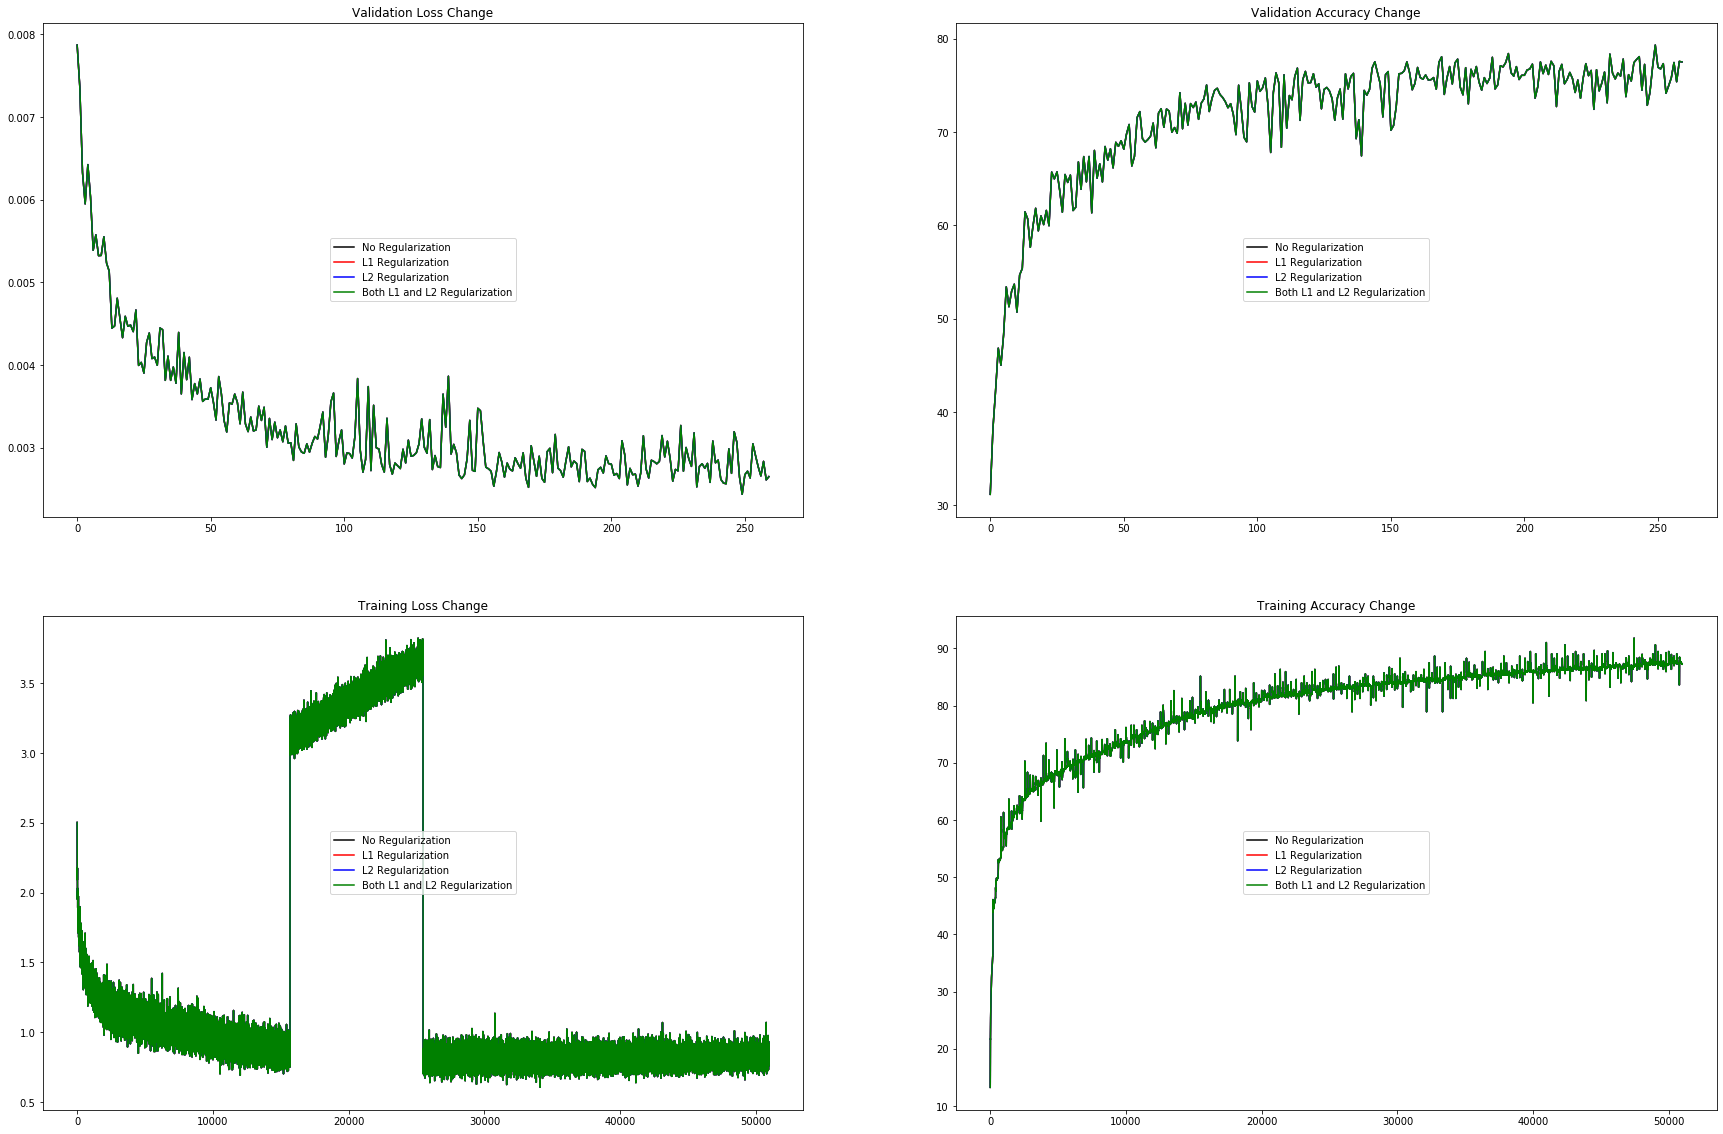

In [13]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)